In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import iris, ad_hoc_data
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7]
%config InlineBackend.figure_format = 'retina'

seed = 12345
algorithm_globals.random_seed = seed

In [2]:
iris_dataset = True

Using iris dataset...


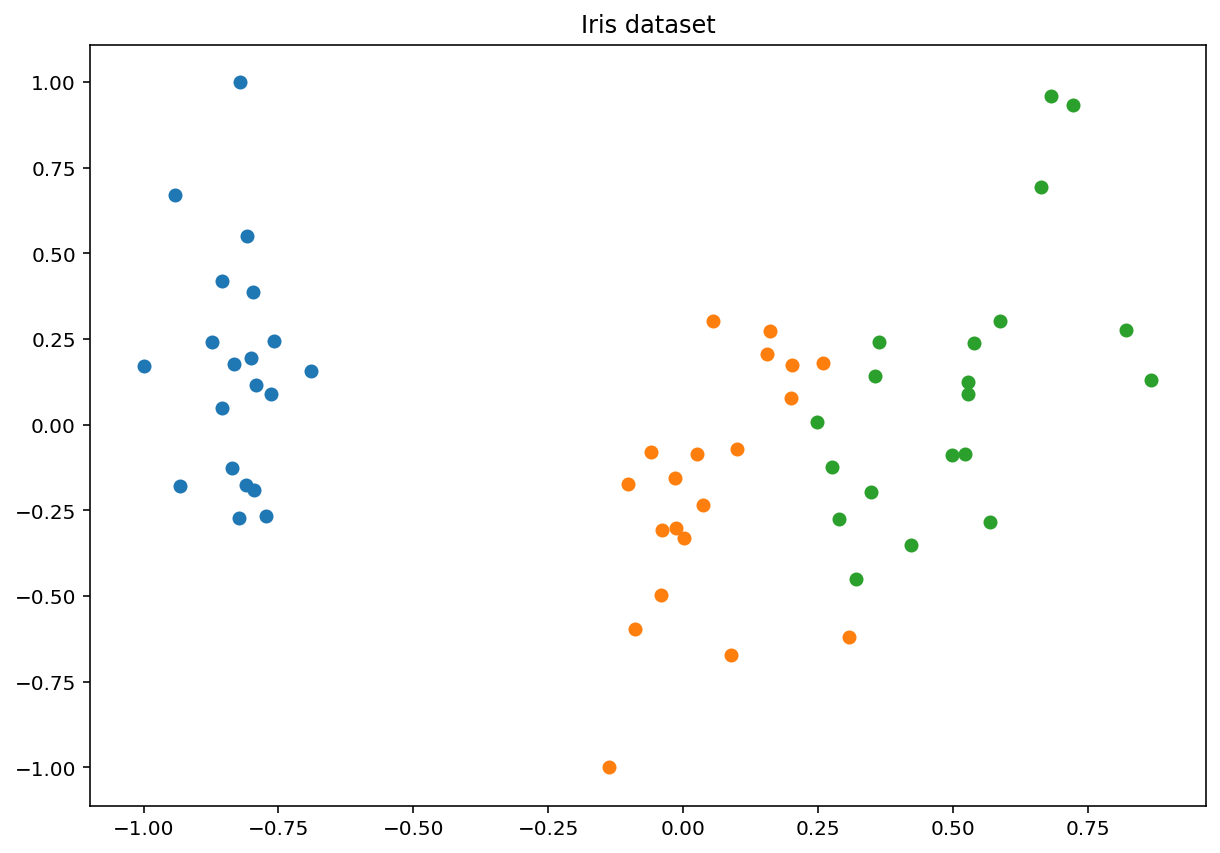

In [3]:
if iris_dataset:
    
    print("Using iris dataset...")
    
    # iris dataset
    dimension = 4

    train_features, train_labels, test_features, test_labels = iris(
        training_size=20,
        test_size=5,
        n=dimension,
        plot_data=True,
        one_hot=False,
    )

else:
    
    print("Using adhoc dataset...")
        
    # adhoc dataset
    dimension = 2

    train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
        training_size=20,
        test_size=5,
        n=adhoc_dimension,
        gap=0.3,
        plot_data=True,
        one_hot=False,
        include_sample_total=True,
    )

In [4]:
train_features[:5]

array([[-0.69002211,  0.15483697, -0.34236881, -0.52272077],
       [-0.82246683, -0.27293588, -0.29271509, -0.02540287],
       [-0.75908951,  0.24454041, -0.57021011, -0.43279738],
       [-0.81000517, -0.17628293, -0.31783265,  0.06185599],
       [-0.85503411,  0.41946018,  0.09204539,  0.05164094]])

In [5]:
train_labels.shape

(60,)

In [6]:
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
feature_map = ZZFeatureMap(feature_dimension=dimension, reps=1, entanglement="full")

backend = QuantumInstance(
    Aer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

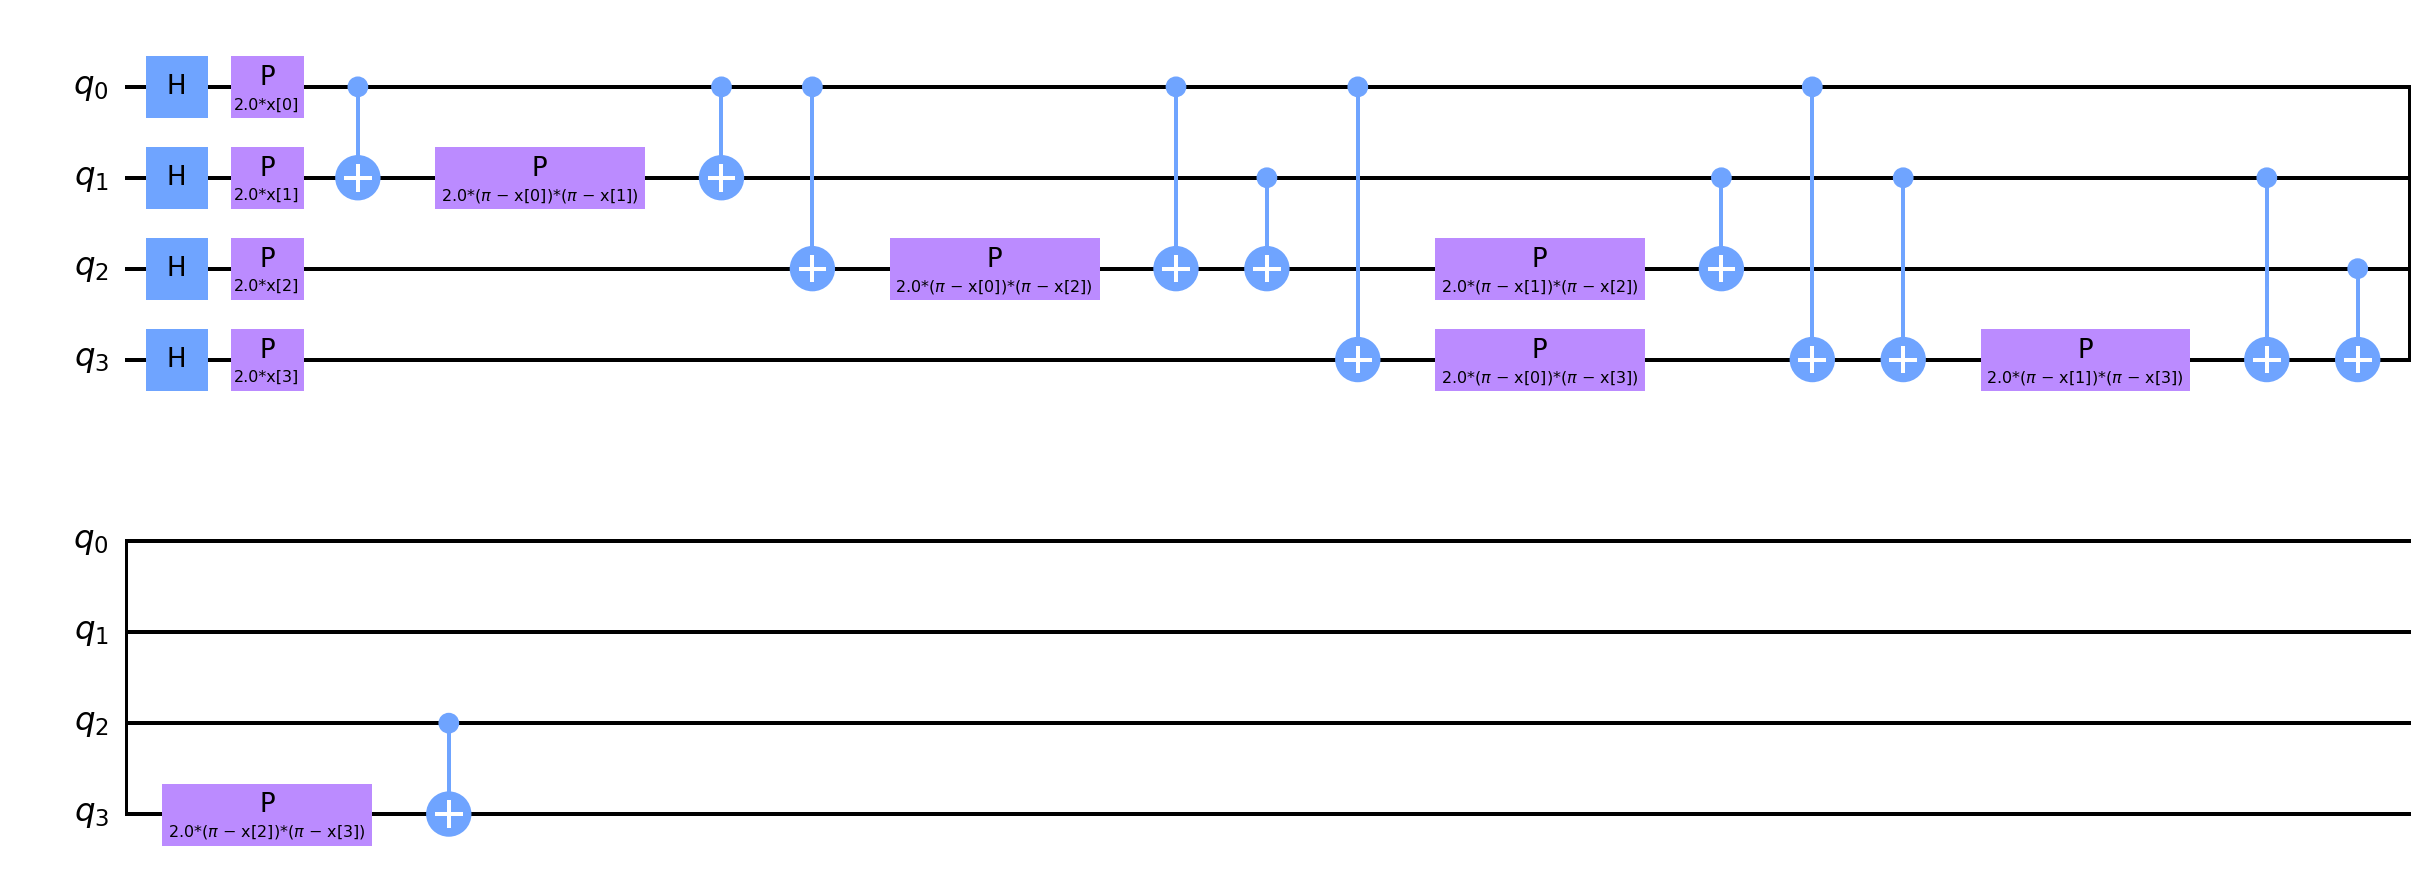

In [8]:
feature_map.decompose().draw('mpl')

In [9]:
qsvc = QSVC(quantum_kernel=kernel)
qsvc.fit(train_features, train_labels)

qsvc_score = qsvc.score(test_features, test_labels)

In [10]:
qsvc.predict(test_features)

array([0, 1, 1, 2, 2])

In [23]:
print("Model score: {:.2f}%".format(qsvc_score*100))

Model score: 80.00%


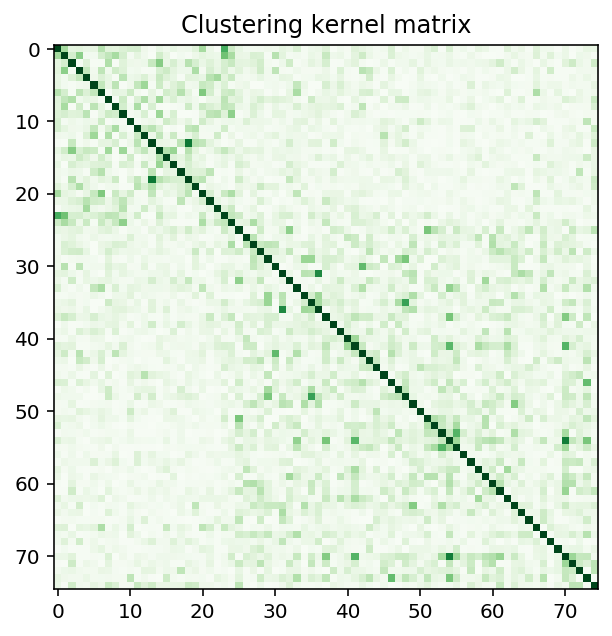

Clustering score: 0.5423746747289556


In [18]:
matrix = kernel.evaluate(x_vec=train_features)

plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Clustering kernel matrix")
plt.show()

spectral = SpectralClustering(2, affinity="precomputed")
cluster_labels = spectral.fit_predict(matrix)
cluster_score = normalized_mutual_info_score(cluster_labels, train_labels)

print(f"Clustering score: {cluster_score}")

In [19]:
feature_map = ZZFeatureMap(feature_dimension=dimension, reps=1, entanglement="full")

backend = QuantumInstance(
    Aer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

In [20]:
if iris_dataset:
    
    train_features, train_labels, test_features, test_labels = iris(
        training_size=25,
        test_size=5,
        n=dimension,
        plot_data=False,
        one_hot=False,
    )
    
else:
    
    train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
        training_size=25,
        test_size=0,
        n=adhoc_dimension,
        gap=0.6,
        plot_data=False,
        one_hot=False,
        include_sample_total=True,
    )

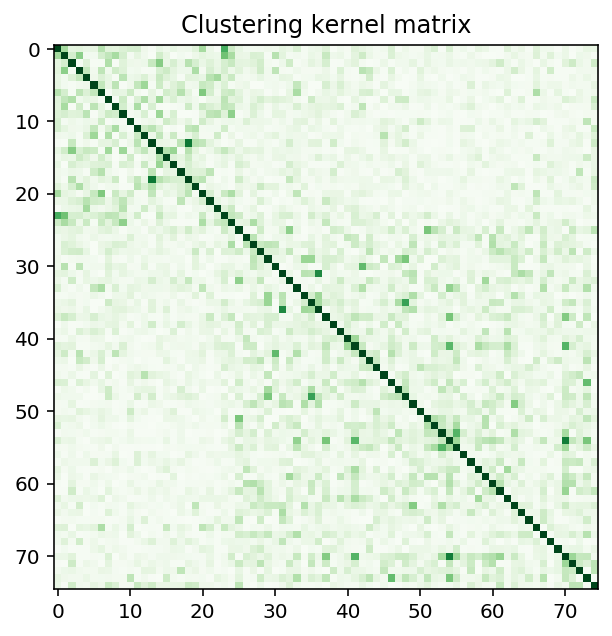

Clustering score: 0.5423746747289556


In [21]:
matrix = kernel.evaluate(x_vec=train_features)

plt.figure(figsize=(5, 5))
plt.imshow(np.asmatrix(matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Clustering kernel matrix")
plt.show()

spectral = SpectralClustering(2, affinity="precomputed")
cluster_labels = spectral.fit_predict(matrix)
cluster_score = normalized_mutual_info_score(cluster_labels, train_labels)

print(f"Clustering score: {cluster_score}")

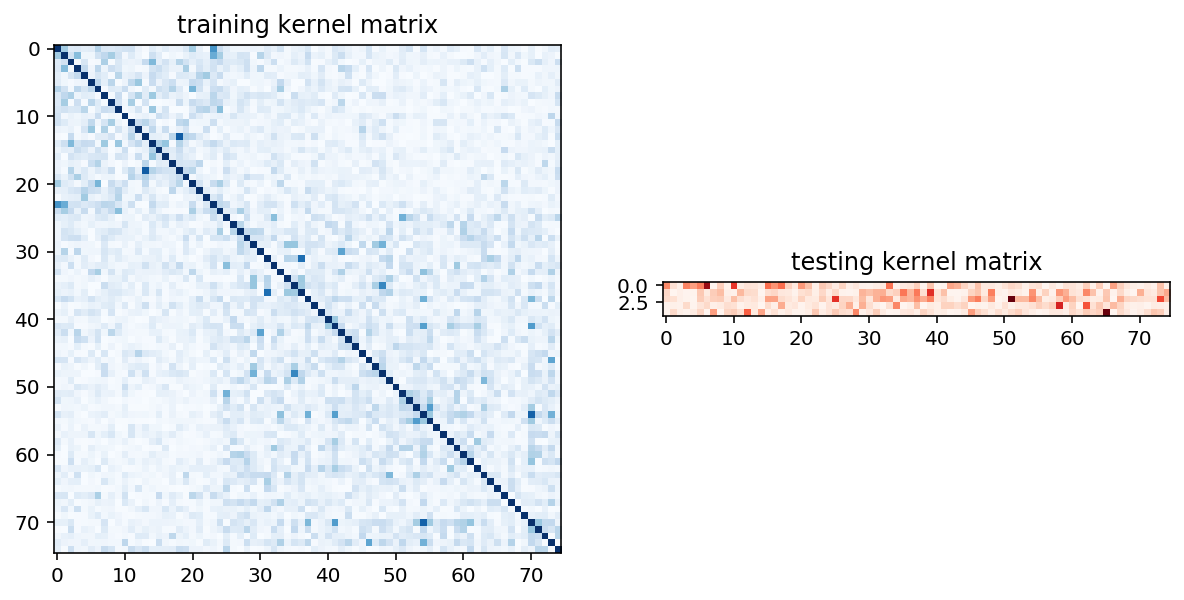

In [22]:
matrix_train = kernel.evaluate(x_vec=train_features)
matrix_test = kernel.evaluate(x_vec=test_features, y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(np.asmatrix(matrix_train), interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(matrix_test), interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("testing kernel matrix")

plt.show()